# Rat sightings data cleaning

This file is an initial play with rat sightings data.

In [162]:
## Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [163]:
rat_sighting = pd.read_csv("data/rat_sightings_data/Rat_Sightings_NYC.csv")

In [164]:
display(rat_sighting.sample(5)) #get a sense of what data looks like

print(f"Below are the columns in the dataframe.\n")
display(rat_sighting.columns)

Unique Key             Created Date              Closed Date Agency  \
106647    51751184  2021 Sep 04 01:08:20 PM  2021 Sep 04 01:08:20 PM  DOHMH   
135236    46126108  2020 May 04 07:45:37 PM  2020 May 04 07:45:37 PM  DOHMH   
108186    51533305  2021 Aug 14 02:54:45 PM                      NaN  DOHMH   
109678    51360208  2021 Jul 28 05:23:19 PM  2021 Jul 28 05:23:19 PM  DOHMH   
65029     57336027  2023 Apr 16 03:22:57 PM  2023 Apr 16 03:22:57 PM  DOHMH   

                                    Agency Name  \
106647  Department of Health and Mental Hygiene   
135236  Department of Health and Mental Hygiene   
108186  Department of Health and Mental Hygiene   
109678  Department of Health and Mental Hygiene   
65029   Department of Health and Mental Hygiene   

       Problem (formerly Complaint Type) Problem Detail (formerly Descriptor)  \
106647                            Rodent                         Rat Sighting   
135236                            Rodent                         Rat Sighting   
108186                            Rodent                         Rat Sighting   
109678                            Rodent                         Rat Sighting   
65029                             Rodent                         Rat Sighting   

                        Location Type  Incident Zip       Incident Address  \
106647        3+ Family Apt. Building       10468.0   3235 GRAND CONCOURSE   
135236  1-2 Family Mixed Use Building       10472.0   1261 ROSEDALE AVENUE   
108186            1-2 Family Dwelling       11208.0    551 SHEPHERD AVENUE   
109678        3+ Family Apt. Building       11221.0     462 CENTRAL AVENUE   
65029           Other (Explain Below)       10471.0  5414 ARLINGTON AVENUE   

        ... Vehicle Type Taxi Company Borough Taxi Pick Up Location  \
106647  ...          NaN                  NaN                   NaN   
135236  ...          NaN                  NaN                   NaN   
108186  ...          NaN                  NaN                   NaN   
109678  ...          NaN                  NaN                   NaN   
65029   ...          NaN                  NaN                   NaN   

       Bridge Highway Name Bridge Highway Direction Road Ramp  \
106647                 NaN                      NaN       NaN   
135236                 NaN                      NaN       NaN   
108186                 NaN                      NaN       NaN   
109678                 NaN                      NaN       NaN   
65029                  NaN                      NaN       NaN   

       Bridge Highway Segment   Latitude  Longitude  \
106647                    NaN  40.877488 -73.885258   
135236                    NaN  40.831522 -73.869192   
108186                    NaN  40.670812 -73.879968   
109678                    NaN  40.692335 -73.915071   
65029                     NaN  40.902619 -73.907694   

                                        Location  
106647  POINT (-73.885258160345 40.877487718552)  
135236  POINT (-73.869191935653 40.831521521008)  
108186  POINT (-73.879968481566 40.670811724281)  
109678  POINT (-73.915070594063 40.692334572326)  
65029    POINT (-73.907693601774 40.90261897451)  

[5 rows x 38 columns]

Below are the columns in the dataframe.



Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Problem (formerly Complaint Type)',
       'Problem Detail (formerly Descriptor)', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='str')

In [165]:
import plotly.figure_factory as ff


# Add a dummy column to count each row
rat_sighting['dummy_count'] = 1

fig = ff.create_hexbin_mapbox(
    data_frame=rat_sighting,
    lat="Latitude",
    lon="Longitude",
    nx_hexagon=60,             # Number of hexagons in x direction
    color="dummy_count",       # Sum of dummy_count = number of occurrences
    agg_func=np.sum,           # Sum the dummy column
    opacity=0.85,
    labels={"color": "Number of Sightings"},
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin=dict(b=0, t=0, l=0, r=0),
)
fig.show()



# Drop the dummy_count that was introduced to make the hexbin map
rat_sighting = rat_sighting.drop(columns=['dummy_count'])



/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:122: RuntimeWarning:

invalid value encountered in cast

/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:123: RuntimeWarning:

invalid value encountered in cast

/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:124: RuntimeWarning:

invalid value encountered in cast

/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:125: RuntimeWarning:

invalid value encountered in cast



General cleaning & neatness

In [166]:
#make letters lowercase, replace spaces with underscores, get rid of text after '(' etc

rat_sighting.columns = [t.partition('(')[0].strip().lower().replace(' ', '_') for t in rat_sighting.columns] #apply to column headers
rat_sighting['location_type'] = rat_sighting['location_type'].str.strip().str.replace(' ', '_').str.lower()  #apply to location_type column

In [167]:
rat_sighting.info()

<class 'pandas.DataFrame'>
RangeIndex: 139418 entries, 0 to 139417
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   unique_key                      139418 non-null  int64  
 1   created_date                    139418 non-null  str    
 2   closed_date                     132417 non-null  str    
 3   agency                          139418 non-null  str    
 4   agency_name                     139418 non-null  str    
 5   problem                         139418 non-null  str    
 6   problem_detail                  139418 non-null  str    
 7   location_type                   139417 non-null  str    
 8   incident_zip                    139415 non-null  float64
 9   incident_address                139418 non-null  str    
 10  street_name                     139418 non-null  str    
 11  cross_street_1                  139230 non-null  str    
 12  cross_street_2             

In [168]:
# Identify columns with only 1 unique value (including NaNs)
cols_to_drop = [c for c in rat_sighting.columns if (rat_sighting[c].nunique(dropna=False) == 1)]

# Drop them all in one go
rat_sighting = rat_sighting.drop(columns=cols_to_drop)

In [169]:
#make the datetime the correct format
rat_sighting['created_date'] = pd.to_datetime(rat_sighting['created_date']) 
rat_sighting['closed_date'] = pd.to_datetime(rat_sighting['closed_date'])
rat_sighting['resolution_action_updated_date'] = pd.to_datetime(rat_sighting['resolution_action_updated_date'])


Consolidate redundant location_type with very similar names

In [170]:
rat_sighting['location_type'].value_counts()

location_type
3+_family_apt._building          63300
1-2_family_dwelling              23799
other_(explain_below)            22837
3+_family_mixed_use_building      8004
commercial_building               7299
construction_site                 2579
vacant_lot                        2507
1-2_family_mixed_use_building     2141
vacant_building                   1740
parking_lot/garage                1634
catch_basin/sewer                 1100
public_garden                      473
sidewalk                           465
school/pre-school                  238
street                             227
government_building                208
office_building                    145
3+_family_apartment_building       110
day_care/nursery                    90
single_room_occupancy_(sro)         87
hospital                            85
public_stairs                       79
street_area                         72
parking_lot_or_garage               63
residential_building                36
catch_basin

In [171]:
# Create a dictionary of the "wrong" names and the "right" name
mapping = {
    '3+_family_apartment_building': '3+_family_apt._building',
    '3+family_apt.': '3+_family_apt._building',
    '3+_family_apt.': '3+_family_apt._building',
    '3+_family_apt': '3+_family_apt._building',
    'residential_building': '3+_family_apt._building',
    'residence': '3+_family_apt._building',
    'apartment': '3+_family_apt._building',
    '1-2_familydwelling': '1-2_family_dwelling',
    'school': 'school/pre-school/nursery',
    'school/pre-school': 'school/pre-school/nursery',
    'day_care_or_nursery': 'school/pre-school/nursery',
    'day_care/nursery': 'school/pre-school/nursery',
    'street':'street_area',
    'restaurant': 'restaurant/bar/deli/bakery',
    'catch_basin_or_sewer': 'catch_basin/sewer',
    'parking_lot_or_garage': 'parking_lot/garage',
    'government_building': 'office/government_building',
    'office/government_ building': 'office/government_building',
    'other_(explain_below)': 'other'
}

# Apply the fix
rat_sighting['location_type'] = rat_sighting['location_type'].replace(mapping)

In [172]:
rat_sighting['location_type'].value_counts()

location_type
3+_family_apt._building          63483
1-2_family_dwelling              23800
other                            22849
3+_family_mixed_use_building      8004
commercial_building               7299
construction_site                 2579
vacant_lot                        2507
1-2_family_mixed_use_building     2141
vacant_building                   1740
parking_lot/garage                1697
catch_basin/sewer                 1117
public_garden                      473
sidewalk                           465
school/pre-school/nursery          341
street_area                        299
office/government_building         208
office_building                    145
single_room_occupancy_(sro)         87
hospital                            85
public_stairs                       79
restaurant/bar/deli/bakery           7
building_(non-residential)           6
summer_camp                          2
1-3_family_mixed_use_building        2
store                                1
cafeteria_-

Consolidate redundant columns

In [173]:
#check if park_borough and borough columns are redundant
print(rat_sighting['park_borough'].equals(rat_sighting['borough']))

True


In [174]:
rat_sighting = rat_sighting.drop(columns='park_borough')

In [175]:
#notice that information from lat, lon are repeated in point

# 1. Update the mask to ensure both lat and lon are present
not_null_mask = (
    rat_sighting['location'].notnull() & 
    rat_sighting['longitude'].notnull() & 
    rat_sighting['latitude'].notnull()
)

# 2. Extract BOTH lon and lat from the POINT string
# POINT (-73.9685 40.7540) -> index 0 is lon, index 1 is lat
coords_from_point = rat_sighting['location'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)').astype(float)

# 3. Check if extracted lon matches 'longitude' AND extracted lat matches 'latitude'
lon_matches = np.isclose(coords_from_point.loc[not_null_mask, 0], rat_sighting.loc[not_null_mask, 'longitude'], atol=1e-4)
lat_matches = np.isclose(coords_from_point.loc[not_null_mask, 1], rat_sighting.loc[not_null_mask, 'latitude'], atol=1e-4)

# 4. Combine them: True only if BOTH match
final_matches = lon_matches & lat_matches

print(pd.Series(final_matches).value_counts())

True    138145
Name: count, dtype: int64


In [176]:
# Drop the 'lattitude' and 'longitude' columns since they are redundant.

rat_sighting = rat_sighting.drop(columns=['latitude', 'longitude'])

In [2]:
# This block currently isn't working it seems.

# # Create a temporary table of just the rows that don't match
# mismatches = rat_sighting[matches == False]

# # Show the community_board and borough columns side-by-side
# mismatches[['community_board', 'borough']].head(20)

In [178]:
# 1. Strip out the word 'Unspecified' and extra spaces from the community board column
cleaned_board = rat_sighting['community_board'].str.replace('Unspecified', '', case=False).str.strip()

# 2. Extract the borough name from what remains (e.g., '03 BRONX' -> 'BRONX')
extracted_borough_cleaned = cleaned_board.str.extract(r'\d*\s*(.*)')

# 3. Re-run the comparison
matches_new = (extracted_borough_cleaned[0] == rat_sighting['borough'])

# 4. Check the results
print(pd.Series(matches_new).value_counts())

True     139380
False        38
Name: count, dtype: int64


In [179]:
# Change 'matches' to 'matches_new' to see the actual errors
mismatches = rat_sighting[matches_new == False]

# Show the columns side-by-side
mismatches[['community_board', 'borough']].head(20)

community_board      borough
3801          08 BRONX    MANHATTAN
4851          08 BRONX    MANHATTAN
10629         08 BRONX    MANHATTAN
17538         08 BRONX    MANHATTAN
44076        01 QUEENS        BRONX
46123    0 Unspecified  Unspecified
49467    0 Unspecified  Unspecified
49817    0 Unspecified  Unspecified
56167    0 Unspecified  Unspecified
66270    0 Unspecified  Unspecified
70961    0 Unspecified  Unspecified
70967    0 Unspecified  Unspecified
84663        01 QUEENS        BRONX
89972         08 BRONX    MANHATTAN
97861    0 Unspecified  Unspecified
97869    0 Unspecified  Unspecified
99434         08 BRONX    MANHATTAN
99749         08 BRONX    MANHATTAN
103502        08 BRONX    MANHATTAN
117351             NaN          NaN

Investigate the dates reports were created vs closed

In [180]:
# Create a mask for rows where both dates exist
both_dates_exist = rat_sighting['created_date'].notnull() & rat_sighting['closed_date'].notnull()

# Compare only the valid rows
real_date_mismatches = rat_sighting[
    (rat_sighting['created_date'] != rat_sighting['closed_date']) & 
    both_dates_exist
]

print(f"Actual mismatches (excluding NaT): {len(real_date_mismatches)}")
real_date_mismatches[['created_date', 'closed_date']].head()

Actual mismatches (excluding NaT): 44624


created_date         closed_date
62 2026-02-06 03:19:07 2026-02-06 07:22:33
69 2026-02-05 17:55:55 2026-02-06 07:36:25
70 2026-02-05 17:37:35 2026-02-06 07:28:15
71 2026-02-05 16:55:36 2026-02-06 12:08:12
75 2026-02-05 14:05:18 2026-02-06 11:23:43

In [181]:
closed_count = rat_sighting['closed_date'].count()
closed_count

np.int64(132417)

In [182]:
print(rat_sighting['status'].value_counts())

status
Closed         132415
In Progress      7001
Unspecified         2
Name: count, dtype: int64


In [183]:
# Create a filter for rows where status is exactly 'Unspecified'
unspecified_status_rows = rat_sighting[rat_sighting['status'] == 'Unspecified']

# Print the resulting rows
unspecified_status_rows

unique_key        created_date closed_date            location_type  \
78134    55378285 2022-09-12 07:19:17         NaT  3+_family_apt._building   
79406    55224677 2022-08-27 14:34:42         NaT                    other   

       incident_zip  incident_address       street_name    cross_street_1  \
78134       11238.0   21 BUTLER PLACE      BUTLER PLACE     PLAZA ST EAST   
79406       10031.0  AMSTERDAM AVENUE  AMSTERDAM AVENUE  AMSTERDAM AVENUE   

         cross_street_2 intersection_street_1  ...  address_type      city  \
78134    STERLING PLACE         PLAZA ST EAST  ...       ADDRESS  BROOKLYN   
79406  WEST  146 STREET      AMSTERDAM AVENUE  ...  INTERSECTION       NaN   

           landmark       status resolution_action_updated_date  \
78134  BUTLER PLACE  Unspecified                            NaT   
79406           NaN  Unspecified                            NaT   

      community_board    borough x_coordinate y_coordinate  \
78134     08 BROOKLYN   BROOKLYN      993,039      185,229   
79406    09 MANHATTAN  MANHATTAN      998,886      240,181   

                                       location  
78134  POINT (-73.968314734802 40.675083208001)  
79406  POINT (-73.947116090801 40.825904765004)  

[2 rows x 21 columns]

In [184]:
# Filter for status 'In Progress' that also have a closed_date
in_progress_with_dates = rat_sighting[
    (rat_sighting['status'] == 'In Progress') & 
    (rat_sighting['closed_date'].notnull())
]

# Display the findings
in_progress_with_dates[['unique_key', 'status', 'created_date', 'closed_date']]

unique_key       status        created_date         closed_date
105392    51936751  In Progress 2021-09-21 10:04:02 1899-12-31 19:00:00
105396    51936175  In Progress 2021-09-21 09:25:55 1899-12-31 19:00:00

In [185]:
# Find rows where status is 'In Progress' but a closed_date exists
status_mismatch = rat_sighting[
    (rat_sighting['status'] == 'In Progress') & 
    (rat_sighting['closed_date'].notnull())
]

print(f"Rows that are 'In Progress' but have a date: {len(status_mismatch)}")
status_mismatch[['unique_key', 'status', 'created_date', 'closed_date']]

Rows that are 'In Progress' but have a date: 2


unique_key       status        created_date         closed_date
105392    51936751  In Progress 2021-09-21 10:04:02 1899-12-31 19:00:00
105396    51936175  In Progress 2021-09-21 09:25:55 1899-12-31 19:00:00

In [186]:
# 1. Create the column first
rat_sighting['days_to_close'] = (rat_sighting['closed_date'] - rat_sighting['created_date']).dt.days

# 2. Now you can filter for negative values
time_travelers = rat_sighting[rat_sighting['days_to_close'] < 0]

# 3. Display the results
time_travelers[['unique_key', 'created_date', 'closed_date', 'days_to_close']]

# Filter for rows where the math resulted in a negative number
time_travelers = rat_sighting[rat_sighting['days_to_close'] < 0]

# Display the key columns to see the date conflict
time_travelers[['unique_key', 'created_date', 'closed_date', 'days_to_close']]

unique_key        created_date         closed_date  days_to_close
105392    51936751 2021-09-21 10:04:02 1899-12-31 19:00:00       -44459.0
105396    51936175 2021-09-21 09:25:55 1899-12-31 19:00:00       -44459.0

Data for how long it took case to close

In [187]:
# 1. Filter for only the 'Closed' status rows
closed_only = rat_sighting[rat_sighting['status'] == 'Closed'].copy()

# 2. Recalculate the days to close for this subset
closed_only['days_to_close'] = (
    (closed_only['closed_date'] - closed_only['created_date']).dt.total_seconds() / 86400
)

# 3. See the summary
print(closed_only['days_to_close'].describe())

count    132415.000000
mean          3.915802
std          16.630024
min           0.000000
25%           0.000000
50%           0.000000
75%           0.861881
max         815.119375
Name: days_to_close, dtype: float64


In [188]:
# Save cleaned up rat_sighting data to a new CSV file

rat_sighting.to_csv("data/rat_sightings_data/Rat_Sightings_Cleaned.csv", index=False)


In [189]:
# Here's a sample of the cleaned up data

rat_sighting.sample(5)

unique_key        created_date         closed_date  \
105694    51887513 2021-09-16 20:59:49 2021-09-16 20:59:49   
117178    50409147 2021-04-28 18:01:02 2021-04-28 18:01:02   
134891    46186606 2020-05-12 19:57:50 2020-05-12 19:57:50   
73852     55968271 2022-11-12 22:27:33 2022-11-12 22:27:33   
132400    46624798 2020-06-25 08:29:47 2020-06-25 08:29:47   

                       location_type  incident_zip        incident_address  \
105694  3+_family_mixed_use_building       11432.0  166-05 HIGHLAND AVENUE   
117178     school/pre-school/nursery       11385.0     69-26 COOPER AVENUE   
134891       3+_family_apt._building       11224.0   2737 WEST   33 STREET   
73852        3+_family_apt._building       11249.0   122 SOUTH    1 STREET   
132400           1-2_family_dwelling       11221.0    585 VAN BUREN STREET   

              street_name   cross_street_1   cross_street_2  \
105694    HIGHLAND AVENUE       166 STREET       167 STREET   
117178      COOPER AVENUE         69 PLACE        70 STREET   
134891   WEST   33 STREET  BAY VIEW AVENUE   NEPTUNE AVENUE   
73852   SOUTH    1 STREET     BERRY STREET   BEDFORD AVENUE   
132400   VAN BUREN STREET         BROADWAY  BUSHWICK AVENUE   

       intersection_street_1  ...       city           landmark  status  \
105694            166 STREET  ...    JAMAICA    HIGHLAND AVENUE  Closed   
117178              69 PLACE  ...  Ridgewood      COOPER AVENUE  Closed   
134891       BAY VIEW AVENUE  ...   BROOKLYN   WEST   33 STREET  Closed   
73852           BERRY STREET  ...   BROOKLYN  SOUTH    1 STREET  Closed   
132400              BROADWAY  ...   BROOKLYN   VAN BUREN STREET  Closed   

       resolution_action_updated_date community_board   borough x_coordinate  \
105694            2021-09-16 20:59:49       08 QUEENS    QUEENS    1,040,462   
117178            2021-04-28 18:01:02       05 QUEENS    QUEENS    1,017,092   
134891            2020-05-12 19:57:50     13 BROOKLYN  BROOKLYN      984,170   
73852             2022-11-12 22:27:33     01 BROOKLYN  BROOKLYN      994,669   
132400            2020-06-25 08:29:47     04 BROOKLYN  BROOKLYN    1,004,798   

       y_coordinate                                  location days_to_close  
105694      198,447   POINT (-73.797239907689 40.71118935808)           0.0  
117178      194,815  POINT (-73.881554489791 40.701337995594)           0.0  
134891      150,132  POINT (-74.000287992403 40.578753693011)           0.0  
73852       199,467  POINT (-73.962416391886 40.714161445057)           0.0  
132400      191,531  POINT (-73.925903105186 40.692361270054)           0.0  

[5 rows x 22 columns]

# Data Visualization

We try to visualize some of the data involved.

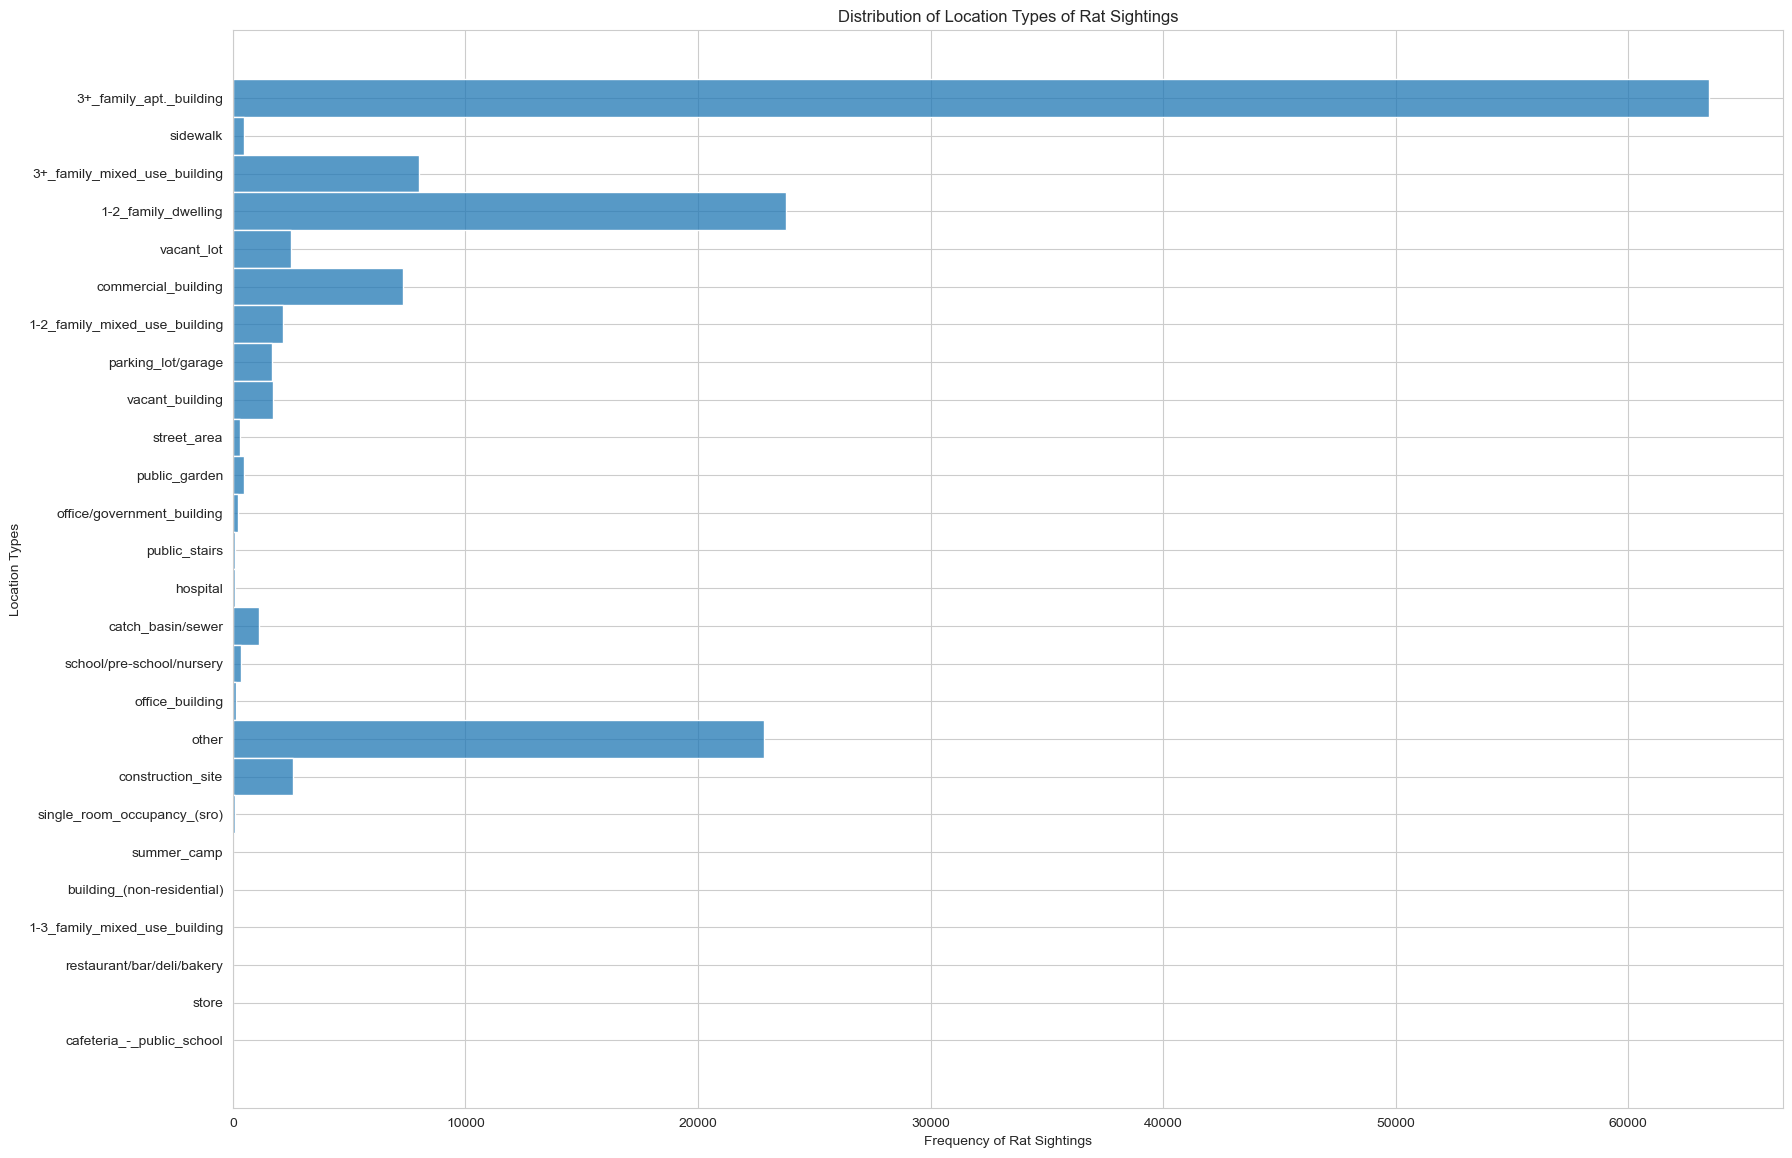

In [190]:
# Histogram of location_type
plt.figure(figsize=(20,14))

sns.set_style("whitegrid")
sns.histplot(y = rat_sighting["location_type"], bins=range(0, len(rat_sighting["location_type"])))
plt.title("Distribution of Location Types of Rat Sightings")
plt.xlabel("Frequency of Rat Sightings")
plt.ylabel("Location Types")
plt.show()

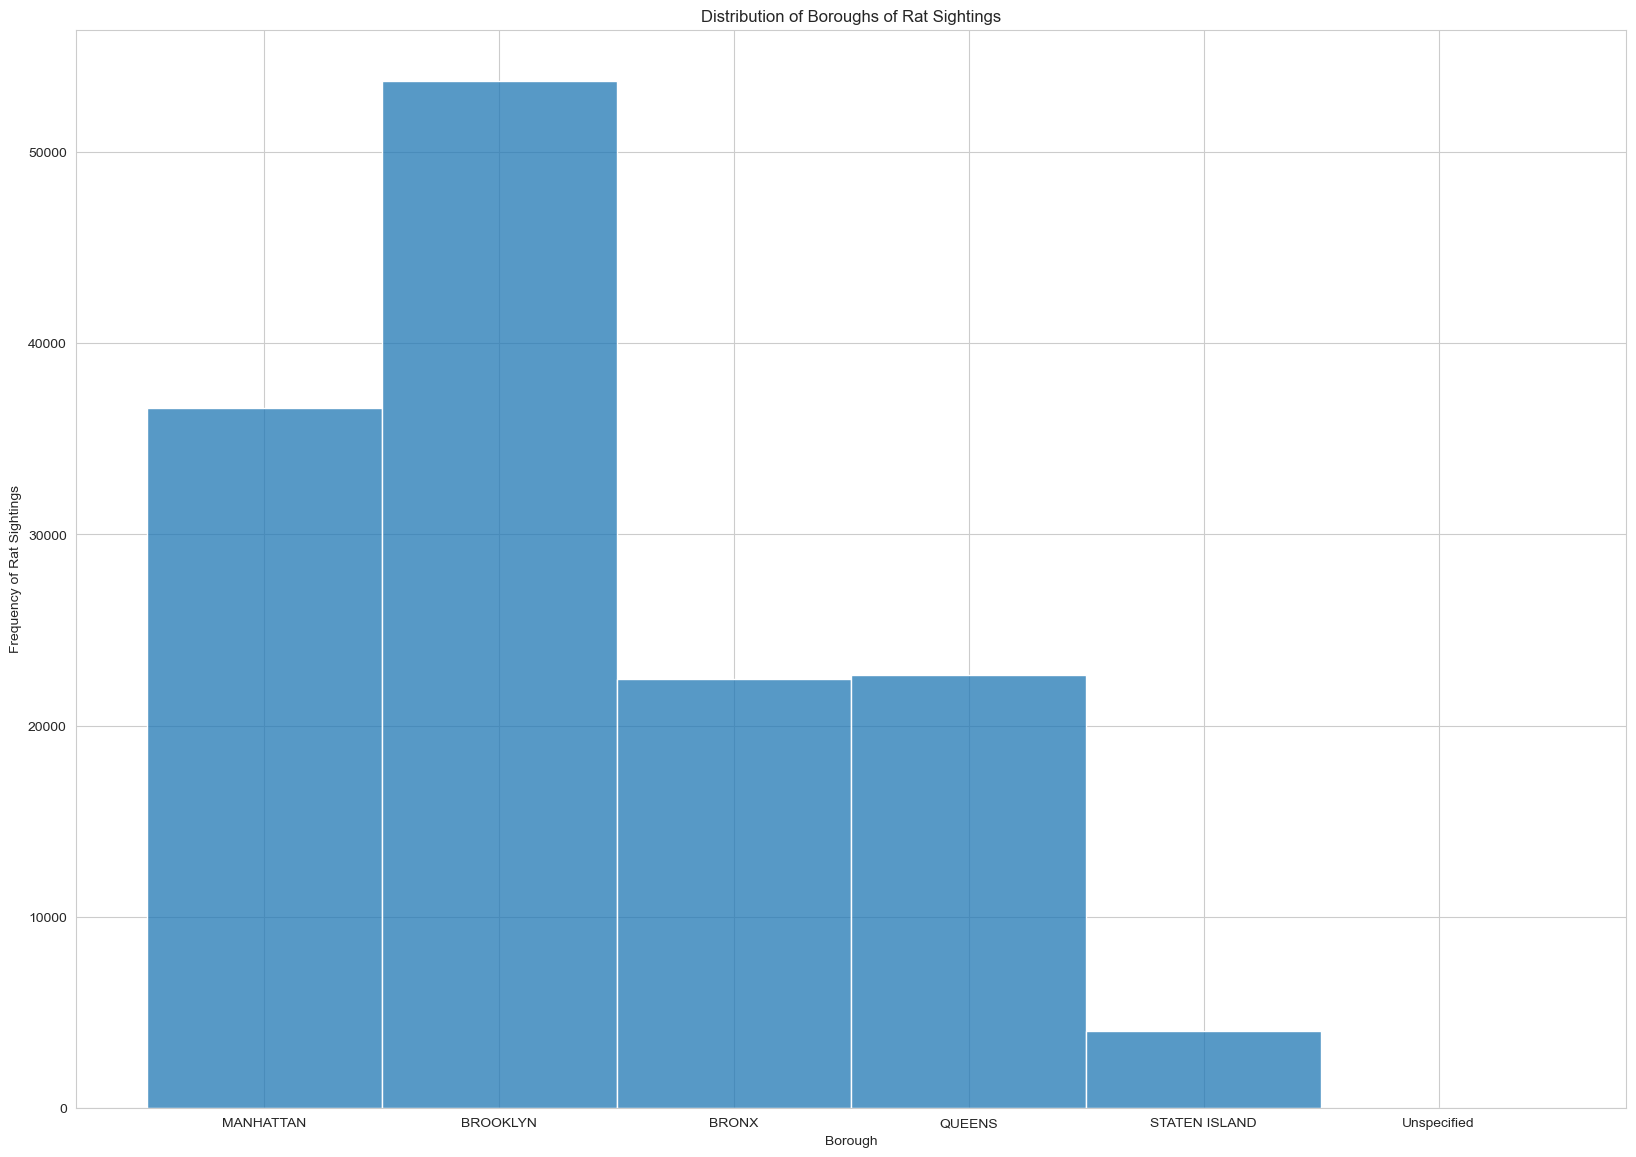

In [191]:
# Histogram by Borough 
plt.figure(figsize=(20,14))

sns.set_style("whitegrid")
sns.histplot(rat_sighting["borough"], bins=range(0, len(rat_sighting["borough"])))
plt.title("Distribution of Boroughs of Rat Sightings")
plt.ylabel("Frequency of Rat Sightings")
plt.xlabel("Borough")
plt.show()

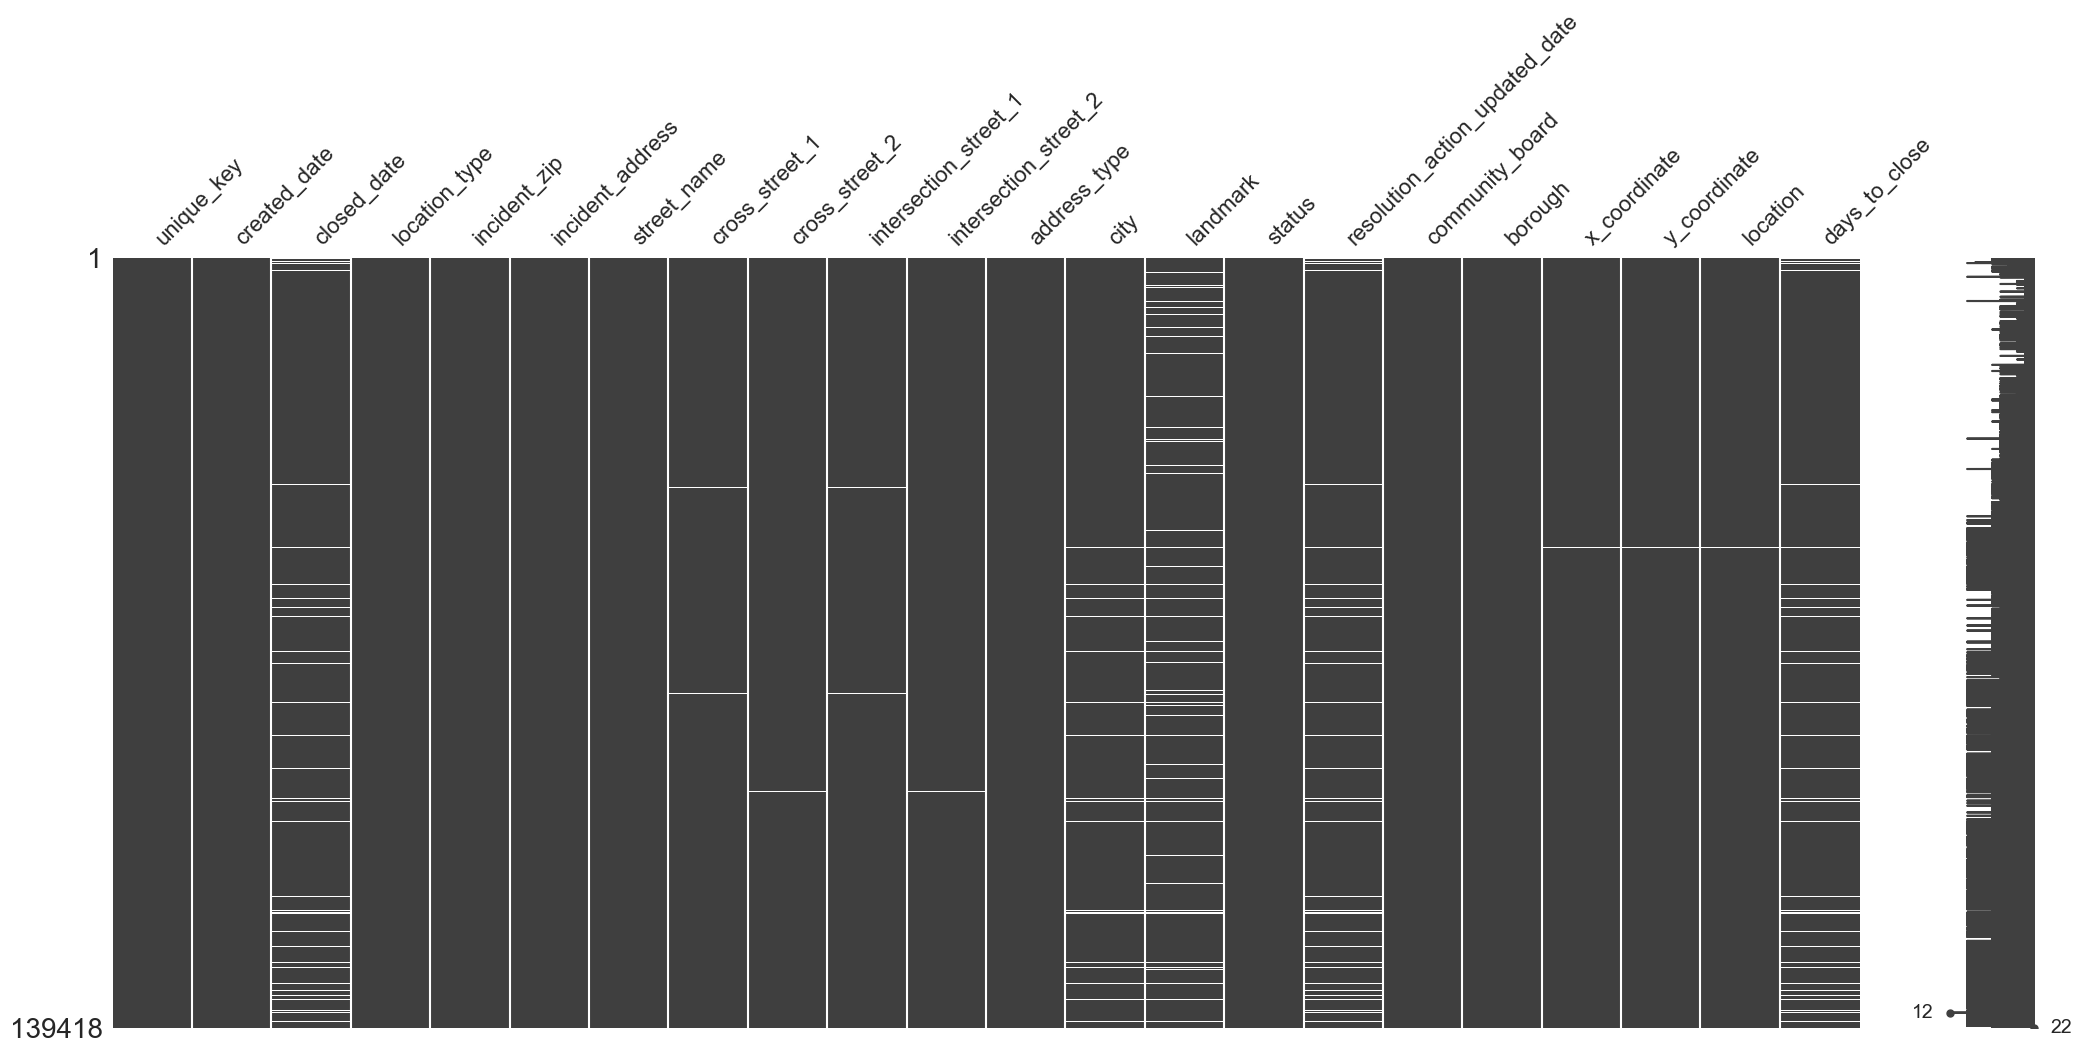

In [192]:
# We check missingness of the data.

msno.matrix(rat_sighting)
plt.show()

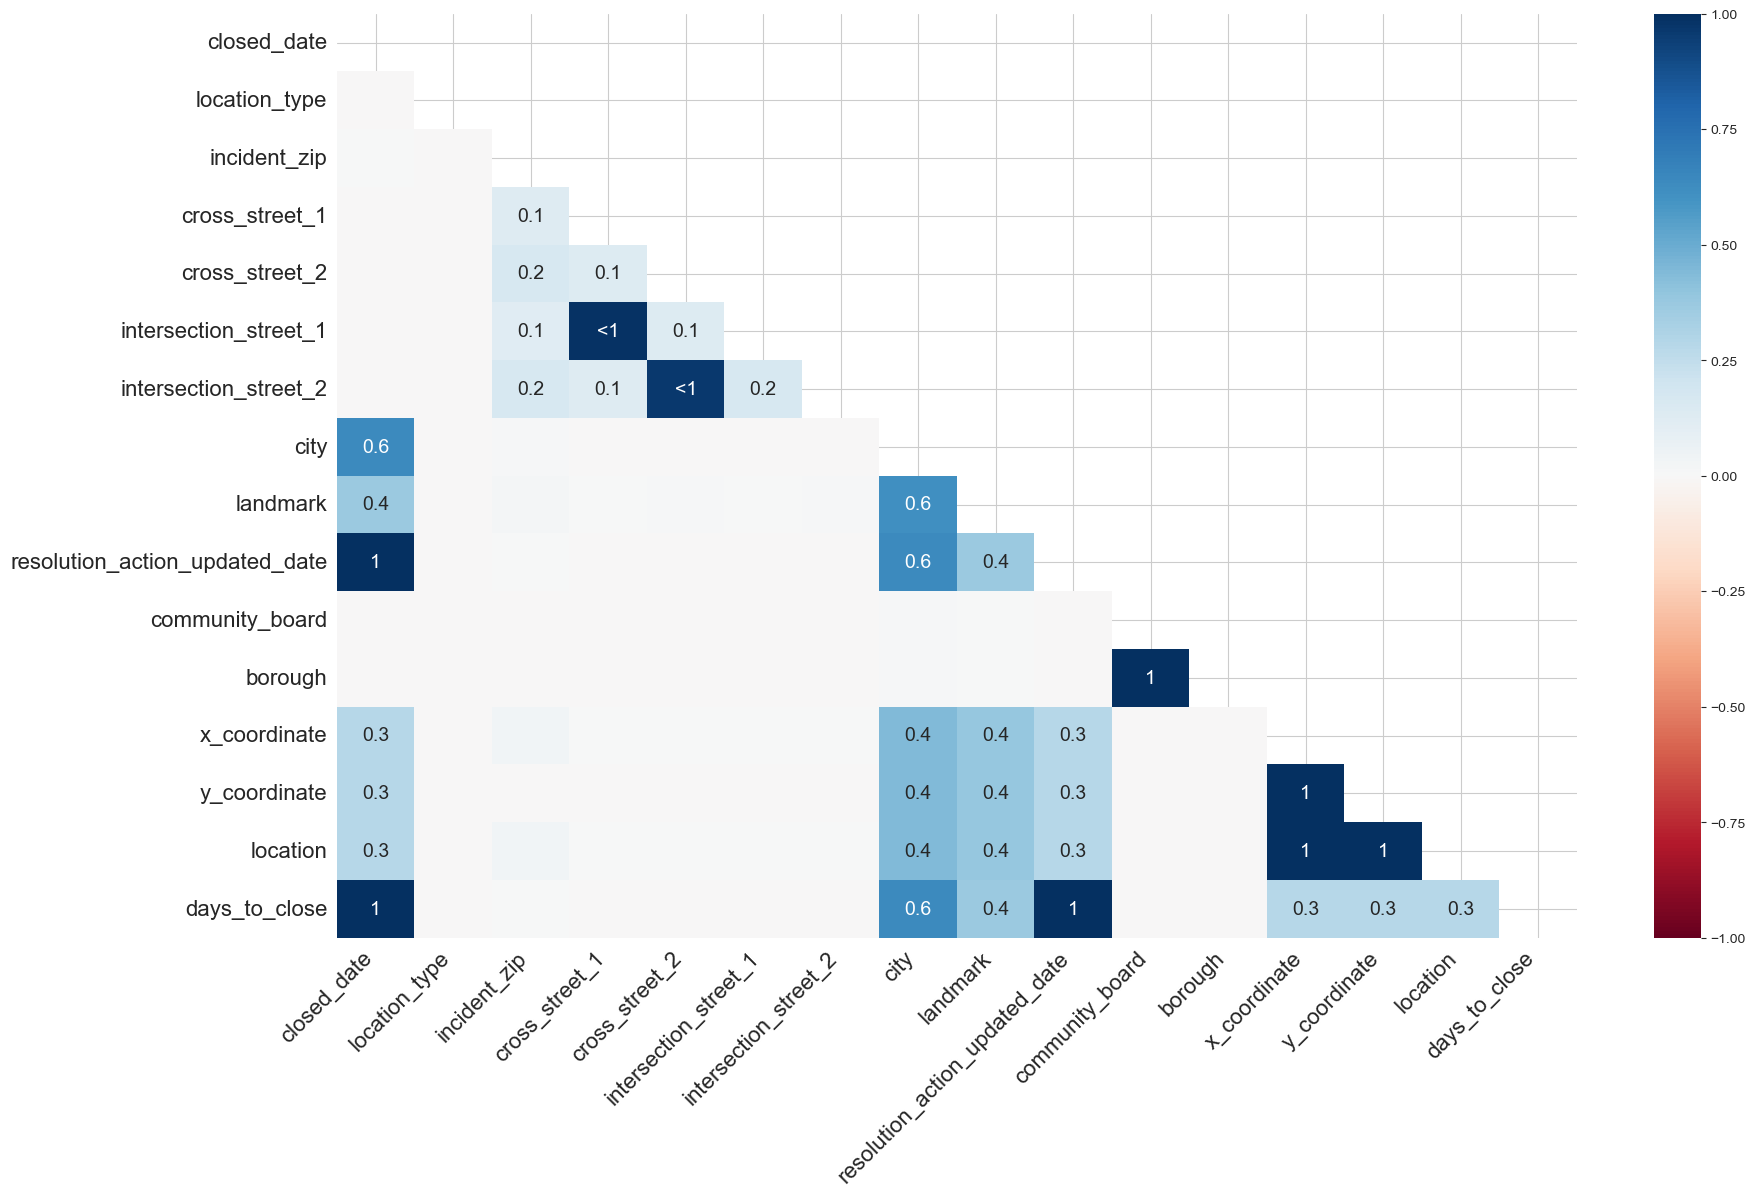

In [193]:
# Here's a heatmap for the missingness.

msno.heatmap(rat_sighting)
plt.show()